## Image Segmentation

**COLOR PICKER FROM IMAGE**


**Dominat Color Extraction Using K-Means**


---




> github.com/dipitvasdev





### Importing Liberaries

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Load Image and Flatten

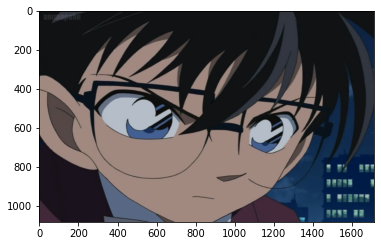

In [2]:
img=cv2.imread('icon.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img_flat=img.reshape((-1,3))
print(img_flat.shape)

(1852200, 3)


### Import Kmeans from sklearn

**Kmean++ Clustering**

In [0]:
from sklearn.cluster import KMeans

In [0]:
dominant_colors=5
km=KMeans(n_clusters=dominant_colors)

In [6]:
km.fit(img_flat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
## RGB values of 8 most dominatn colors
km.cluster_centers_

array([[ 17.41953278,  18.4071858 ,  21.72114105],
       [158.88370842, 136.78505947, 128.52868085],
       [ 84.57770542,  87.98207492,  98.76665463],
       [ 31.86218964,  45.80339808,  69.51608816],
       [178.95154392, 187.86760352, 198.50039949]])

**These are float , convert them to integers**

In [8]:
centers=np.array(km.cluster_centers_,dtype='uint8')
print(centers)

[[ 17  18  21]
 [158 136 128]
 [ 84  87  98]
 [ 31  45  69]
 [178 187 198]]


### Plotting the colors

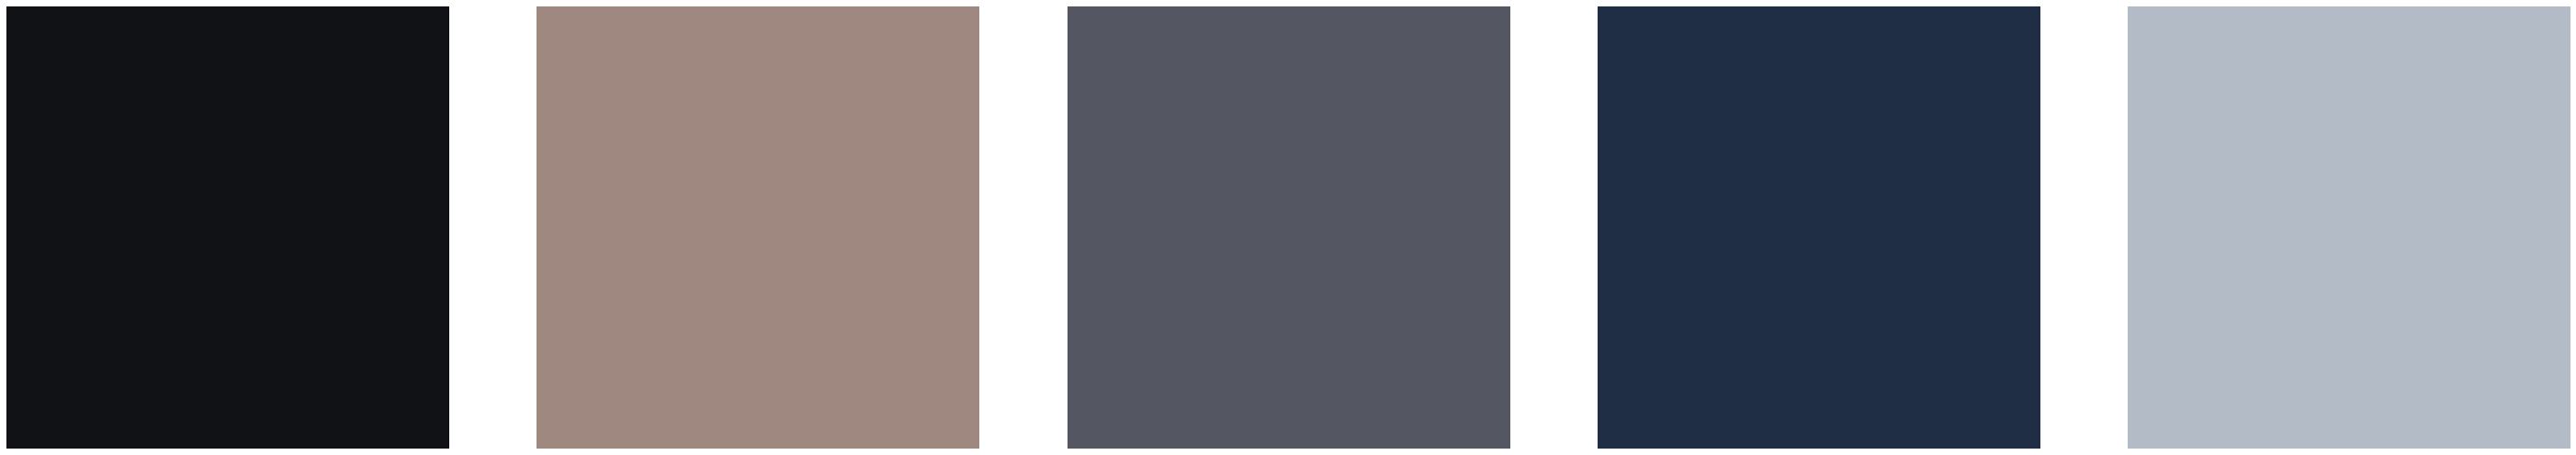

In [9]:
i=1
plt.figure(0,figsize=(50,50))
colors=[]
for color in centers:
  plt.subplot(1,dominant_colors,i)
  plt.axis('off')
  i+=1                                              
  colors.append(color)
  a=np.zeros((100,100,3),dtype='uint8')
  a[:,:,:]=color
  plt.imshow(a)
plt.show()

### Segmenting the original image

In [10]:
img_flat.shape[0]

1852200

In [11]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

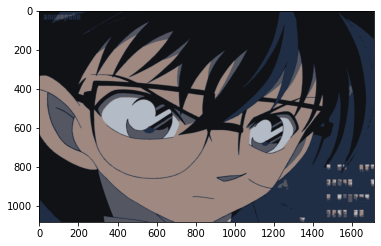

In [12]:
seg_img=np.zeros((img_flat.shape[0],3),dtype='uint8')
for ix in range(seg_img.shape[0]):
  seg_img[ix]=colors[km.labels_[ix]]
seg_img=seg_img.reshape((img.shape))
plt.imshow(seg_img)